/Users/eriknymobohne/Documents/vscode/machine-learning/tipping/bettingAI/bettingAI/venv/lib/python3.10/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


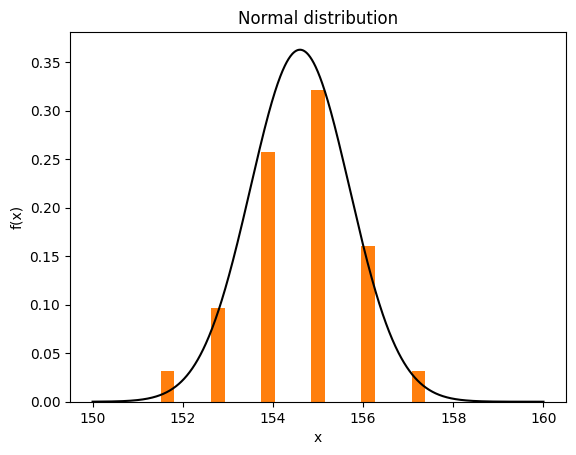

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define values
mu = 154.6
sigma = 1.1

def f(x):
    return (np.exp(-(x-mu)**2 / (2*sigma**2)) / (sigma * np.sqrt(2*np.pi)))

x = np.linspace(150, 160, 1000)
y = f(x)

# Load data from kai.csv
data = np.loadtxt('kai.csv', delimiter=',', skiprows=1)
plt.hist(data, bins=9, range=(150, 160), density=True)

# Plot the function
plt.plot(x, y, color='black')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Normal distribution')
plt.savefig('normal.png')
plt.show()

In [20]:
# Define the function f(x)
def f(x):
    return np.exp(-x**2 / 2) / np.sqrt(2*np.pi)

# Find the area under the curve of the function f(x) from 0 to 1
a = 0
b = 1
n = 1000
h = (b-a) / n
s = 0.5 * (f(a) + f(b))

# Use the trapezoidal rule to approximate the integral
for i in range(1, n):
    s += f(a + i*h)

integral = h * s

# Print the calculated integral
print(integral)

0.341344725904316


In [22]:
# Lets solve the integral using riemann sum
a = 0
b = 1
n = 1000
h = (b-a) / n

# Use the riemann sum to approximate the integral
integral = 0
for i in range(n):
    integral += f(a + i*h) * h
    
# Print the calculated integral
print(integral)

0.34142321168225637


In [39]:
# Mid point sum
a = 0
b = 1
n = 10
h = (b-a) / n

integral = 0
for i in range(n):
    mid_point = a + h*(i + 0.5)
    integral += f(mid_point) * h
    
print("Mid point: ", integral)

Mid point:  0.3414456260626376


In [40]:
# Trapes metoden
b = 1
n = 10
h = (b-a) / n

integral = 0
for i in range(n):
    integral += ((f(a + i*h) + f(a + (i+1)*h)) / 2) * h
    
print("Trapez: ", integral)

Trapez:  0.3411430365359701


In [51]:
def sinc(x):
    if x == 0:
        return 1
    else:
        return np.sin(x) / x
    
a = 0
b = np.pi
n = 5
h = (b-a) / n

integral_mid = 0
integral_trap = 0
for i in range(n):
    
    mid_point = a + h*(i+0.5)
    integral_mid += sinc(mid_point) * h
    
    integral_trap += h * (sinc(a + i*h) + sinc(a + (i+1)*h)) / 2
    
print("Mid point: ", integral_mid)
print("Trapesmetoden: ", integral_trap)
print("Difference: ", abs(integral_mid - integral_trap))

Mid point:  1.8571968075395155
Trapesmetoden:  1.8414379276371988
Difference:  0.015758879902316725


In [52]:
def simpsons_rule(f, a, b, n):
    """
    Approximate the integral of f(x) from a to b by Simpson's rule.

    f: the function to integrate.
    a, b: the limits of integration.
    n: the number of intervals; must be an even integer.
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    S = h / 3 * np.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])
    return S

# Define the function to integrate
def integrand(x):
    return np.exp(-x**2 / 2)

# Set the limits of integration and number of intervals
a = 0
b = 1
n = 1000  # An even integer, increase for higher precision

# Calculate the integral
integral_approximation = simpsons_rule(integrand, a, b, n)
print(integral_approximation)

0.8556243918921554


Lets solve $$ x_{dot} = x, x(0) = 1 $$ and $$ v_{dot} = 1 - v^2, v(0) = 0 $$

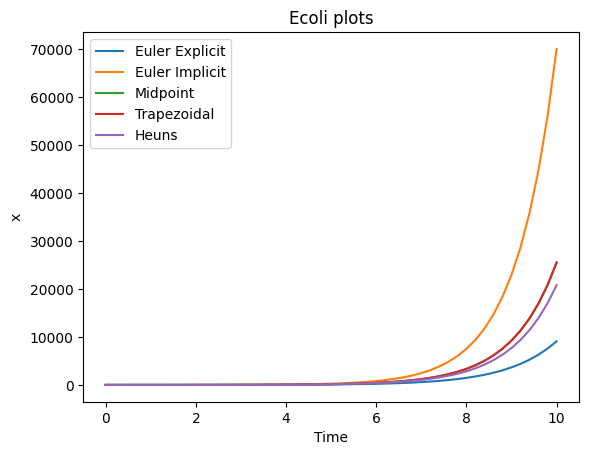

In [82]:
# Lets solve these with
# 1. Euler explicit
# 2. Euler implicit
# 3. Midpoint
# 4. Trapeziodal
# 5. Heuns 
# 6. Simpsons

def f(x):
    return x

# Common values
T = 10
N = 50
h = T / N

# Euler explicit
x_values = np.zeros(N + 1)
x_values[0] = 1
for i in range(N):
    x_values[i+1] = x_values[i] + h*f(x_values[i])

plt.plot(np.linspace(0, T, N+1), x_values, label='Euler Explicit')
plt.xlabel('Time')
plt.ylabel('x')


# Euler implicit method
x_values = np.zeros(N + 1)
x_values[0] = 1
for i in range(N):
    
    # Use fix point to find x_n+1
    x_plus_one = x_values[i]
    for n in range(1000):
        x_plus_one = x_values[i] + h*f(x_plus_one)
        
    x_values[i+1] = x_plus_one

plt.plot(np.linspace(0, T, N+1), x_values, label='Euler Implicit')


# Midpoint method
x_values = np.zeros(N + 1)
x_values[0] = 1
for i in range(N):

    # Use fix point to find x_n+1
    x_plus_one = x_values[i]
    for n in range(1000):
        x_plus_one = x_values[i] + h*f(x_plus_one)
    
    x_values[i+1] = x_values[i] + h*f((x_values[i] + x_plus_one) / 2)
    
plt.plot(np.linspace(0, T, N+1), x_values, label='Midpoint')


# Trapezoidal method
x_values = np.zeros(N + 1)
x_values[0] = 1
for i in range(N):
    
    # Use fix point to find x_n+1
    x_plus_one = x_values[i]
    for n in range(1000):
        x_plus_one = x_values[i] + h*f(x_plus_one)
    
    x_values[i+1] = x_values[i] + h*(f(x_values[i]) + f(x_plus_one)) / 2
    
plt.plot(np.linspace(0, T, N+1), x_values, label='Trapezoidal')


# Heuns method
x_values = np.zeros(N + 1)
x_values[0] = 1
for i in range(N):
    
    x_values[i+1] = x_values[i] + (h/2)*(f(x_values[i]) + f(x_values[i] + h*f(x_values[i])))

plt.plot(np.linspace(0, T, N+1), x_values, label='Heuns')
plt.legend()
plt.title("Ecoli plots")
plt.savefig("ecoli.png")

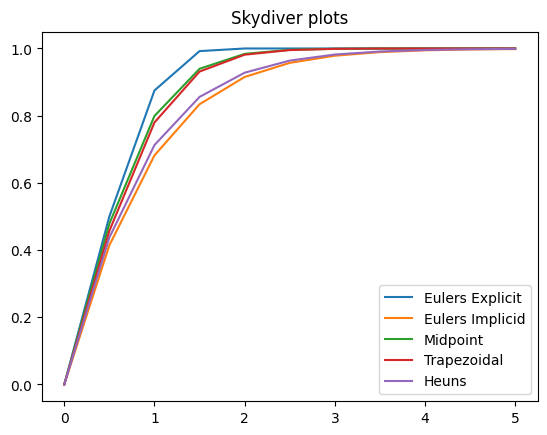

In [80]:
# Lets solve these with
# 1. Euler explicit
# 2. Euler implicit
# 3. Midpoint
# 4. Trapeziodal
# 5. Heuns 
# 6. Simpsons

def v_dot(v):
    return 1 - v**2

# Common values
T = 5
N = 10
h = T / N

# Eulers explicit method
v = np.zeros(N+1)
for i in range(N):
    v[i+1] = v[i] + h*v_dot(v[i])
    
plt.plot(np.linspace(0,T,N+1), v, label="Eulers Explicit")


# Eulers implicid
v = np.zeros(N+1)
for i in range(N):
    
    v_next = v[i]
    for j in range(1000):
        v_next = v[i] + h*v_dot(v_next)
    
    v[i+1] = v_next
    
plt.plot(np.linspace(0,T,N+1), v, label="Eulers Implicid")


# Midpoint
v = np.zeros(N+1)
for i in range(N):
    
    v_next = v[i]
    for j in range(1000):
        v_next = v[i] + h*v_dot(v_next)

    v[i+1] = v[i] + h*v_dot((v[i] + v_next) / 2)
    
plt.plot(np.linspace(0,T,N+1), v, label="Midpoint")


# Trapeziodal
v = np.zeros(N+1)
for i in range(N):
    
    v_next = v[i]
    for j in range(1000):
        v_next = v[i] + h*v_dot(v_next)

    v[i+1] = v[i] + (h/2)*(v_dot(v[i]) + v_dot(v_next))
    
plt.plot(np.linspace(0,T,N+1), v, label="Trapezoidal")


# Heuns
v = np.zeros(N+1)
for i in range(N):
    v[i+1] = v[i] + (h/2)*(v_dot(v[i]) + v_dot(v[i] + h*v_dot(v[i])))
    
plt.plot(np.linspace(0,T,N+1), v, label="Heuns") 
plt.legend()
plt.title("Skydiver plots")
plt.savefig("skydiver.png")

La oss prøve oss på Temperatur likningen $$ T_{dot} + T - 2 = 0, T(0) = 0.1$$


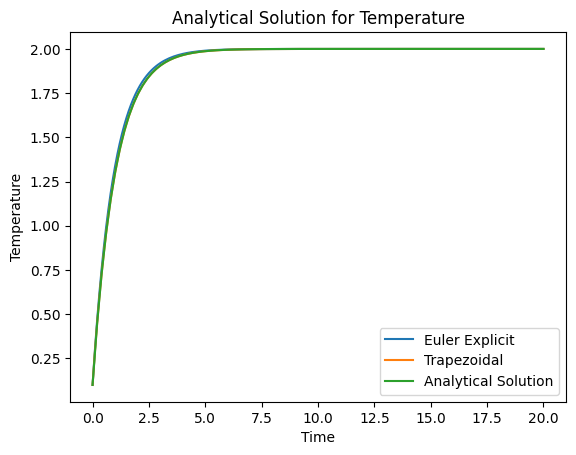

In [90]:
#Define some values
t = 10
h = 0.1
N = int(t/h)

# Euler explicit
T = np.zeros(N+1)
T[0] = 0.1
for i in range(N):
    T[i+1] = T[i] + h*(2 - T[i])
    
plt.plot(np.linspace(0,t,N+1), T, label="Euler Explicit")

# Trapezoidal
T = np.zeros(N+1)
T[0] = 0.1
for i in range(N):
    
    T_next = T[i]
    for j in range(1000):
        T_next = T[i] + h*(2 - T[i])
        
    T[i+1] = T[i] + (h/2)*((2-T[i]) + (2-T_next))
    
plt.plot(np.linspace(0,t,N+1), T, label="Trapezoidal")


import matplotlib.pyplot as plt

t = np.linspace(0, 10, 100)
T_analytical = 2 - (19/10)*np.exp(-t)
plt.plot(t, T_analytical, label="Analytical Solution")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Analytical Solution for Temperature")
plt.savefig("temperature.png")